# Gun Classification Project

In [6]:
import os
import cv2
import imghdr
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# 1. Remove images in an other extension

In [3]:
data_dir = 'C:\\Users\\ussam\\OneDrive\\Desktop\\Gun Dectecti0n\\NewDataset\\train' 

In [18]:
os.listdir(data_dir)

['12Bore', 'Knife', 'Pistol', 'Rifle', 'Sniper_50cal']

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 2. Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [128]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4998 files belonging to 5 classes.


In [129]:
data_iterator = data.as_numpy_iterator() 

In [130]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000027A7997F560>)

In [131]:
batch = data_iterator.next()

In [132]:
batch

(array([[[[253.      , 253.      , 253.      ],
          [253.      , 253.      , 253.      ],
          [253.      , 253.      , 253.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[253.      , 253.      , 253.      ],
          [253.      , 253.      , 253.      ],
          [253.      , 253.      , 253.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          [254.      , 254.      , 254.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [133]:
len(batch)

2

In [134]:
batch[0].shape

(32, 256, 256, 3)

In [135]:
batch[0]

array([[[[253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]

In [136]:
batch[1].shape

(32,)

In [137]:
batch[1]

array([1, 1, 3, 2, 2, 2, 4, 2, 3, 4, 1, 2, 1, 2, 0, 3, 3, 4, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 3, 0, 1])

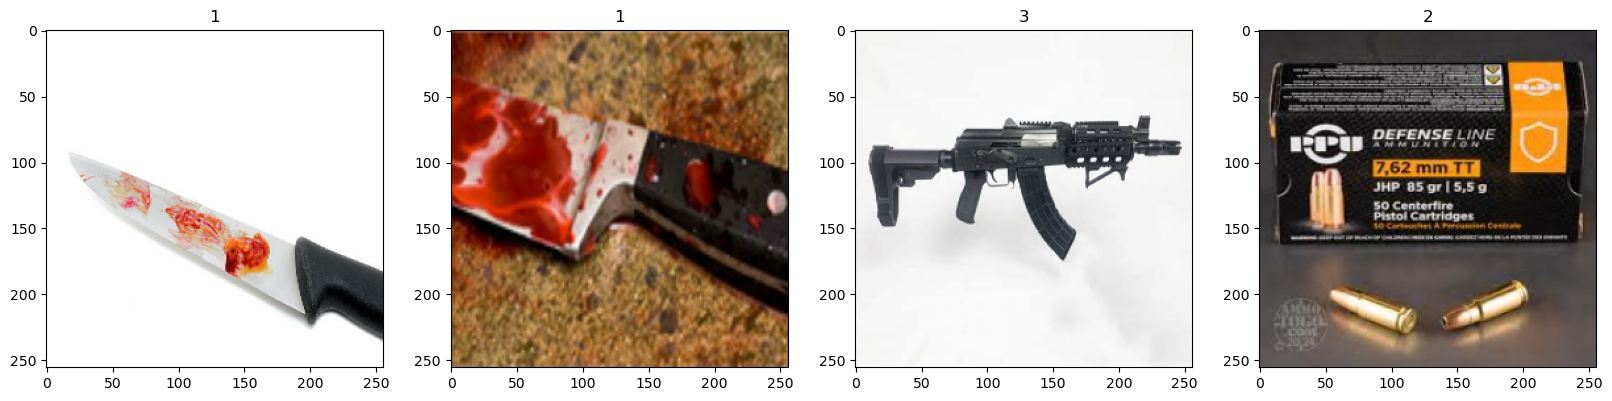

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [139]:
data = data.map(lambda x,y: (x/255, y))

In [140]:
scaled_iterator = data.as_numpy_iterator()

In [141]:
batch = scaled_iterator.next()

In [142]:
batch[0].min()

0.0

In [143]:
batch[0].max()


1.0

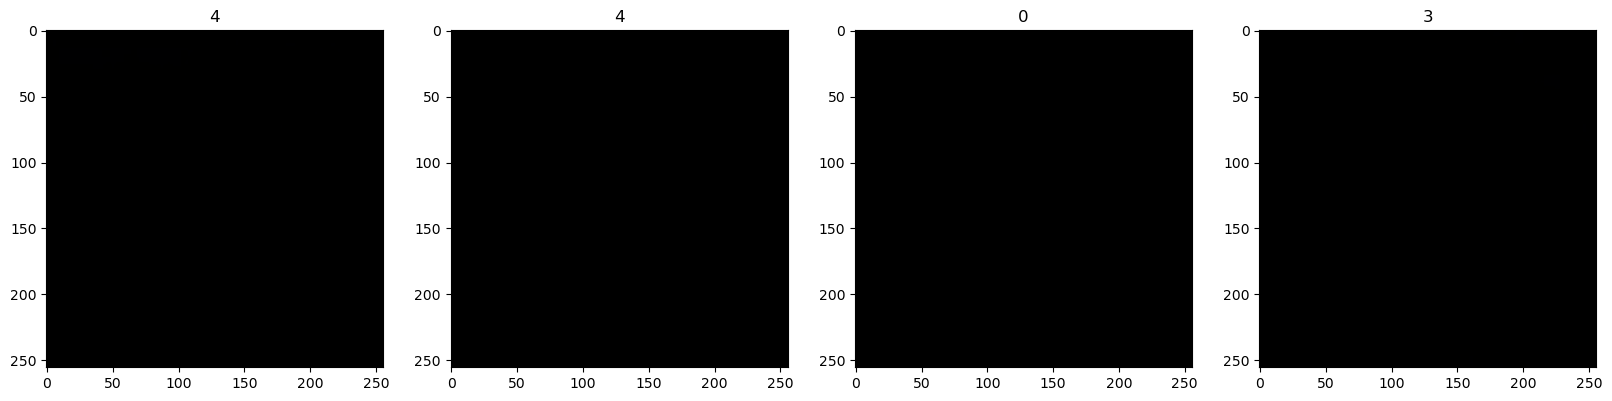

In [144]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

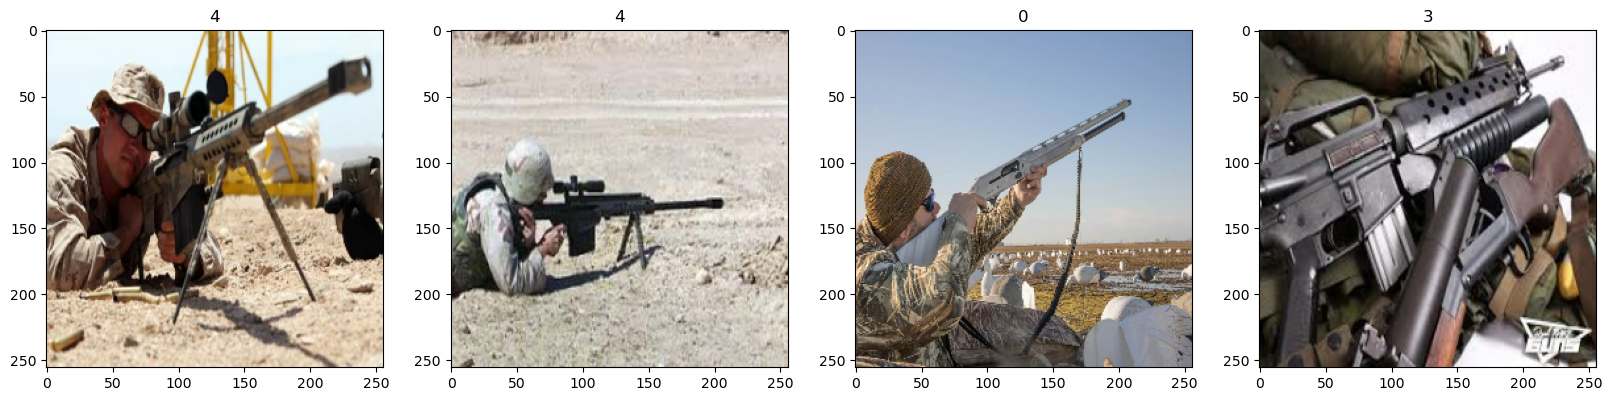

In [145]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 4. Split Data

In [146]:
len(data)

157

In [147]:
train_size = int(len(data)*.7)+6+2+27
val_size = int(len(data)*.2)-6-17
test_size = int(len(data)*.1)-10

In [148]:
train_size

144

In [149]:
val_size

8

In [150]:
test_size

5

In [151]:
train_size+val_size+test_size

157

In [152]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [153]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [155]:
model = Sequential()

In [156]:
model = Sequential([
    Input(shape=(256, 256, 3)),  # Correctly use Input to define the input shape
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])


In [157]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [158]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,653 (14.11 MB)

 Trainable params: 3,697,653 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Train

In [159]:
logdir='logs'

In [160]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [161]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 45s 291ms/step - accuracy: 0.3155 - loss: 1.6120 - val_accuracy: 0.5078 - val_loss: 1.2514
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 304ms/step - accuracy: 0.5283 - loss: 1.1990 - val_accuracy: 0.6250 - val_loss: 1.0008
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.7124 - loss: 0.7880 - val_accuracy: 0.7383 - val_loss: 0.7216
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 304ms/step - accuracy: 0.8550 - loss: 0.4167 - val_accuracy: 0.7930 - val_loss: 0.6280
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 304ms/step - accuracy: 0.9480 - loss: 0.1902 - val_accuracy: 0.8242 - val_loss: 0.7751
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 45s 309ms/step - accuracy: 0.9760 - loss: 0.1014 - val_accuracy: 0.8438 - val_loss: 0.7831
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 304ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.8555 - val_loss: 0.7287
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - accuracy: 0.9843 - loss: 0

# 7. Plot Performance

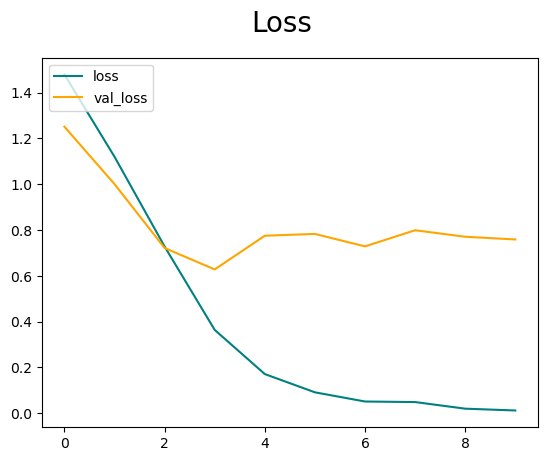

In [162]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

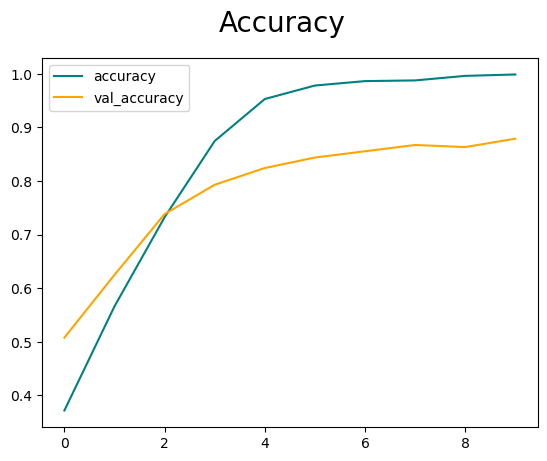

In [163]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Evaluate

In [164]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [171]:
# Accuracy on test dataset
model.evaluate(test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.8679 - loss: 0.8303


[0.8451395630836487, 0.8731343150138855]

# 8. Model Save

In [ ]:
model.save('Gun_classifier.keras')

# 9. Again Load Saved Model

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model = load_model("Gun_classifier.keras")
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,092,961 (42.32 MB)

 Trainable params: 3,697,653 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,395,308 (28.21 MB)

# 10. Testing on out side images

In [4]:
# we create a function check images
def Gun_check(image_path):

    import cv2
    import numpy as np
    import tensorflow as tf
    img = cv2.imread(image_path)
    
    # show image
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    resize = tf.image.resize(img, (256,256))
    np.expand_dims(resize,0).shape
    a=model.predict(np.expand_dims(resize/255, 0))
    c=np.argmax(a)

    # class 0 is 12bore
    # class 1 is knife
    # class 2 is pisol
    # class 3 is rifle
    # class 4 is sniper

    if c == 0:
        print("12-Bore (ShortGun)")
    elif c == 1:
        print("knife")
    elif c == 2:
        print("Pistol")
    elif c == 3:
        print("Rifle")
    elif c == 4:
        print("Sniper")


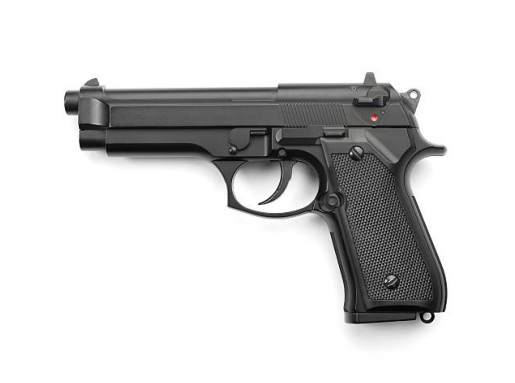

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
Pistol


In [5]:
Gun_check("test.jpg")

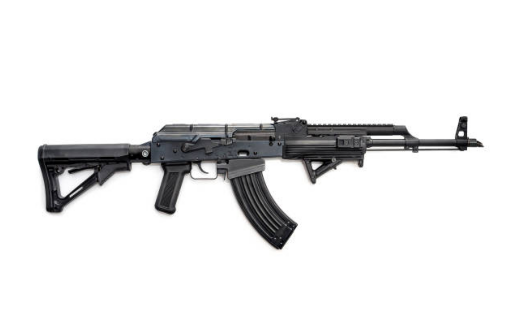

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Rifle


In [184]:
Gun_check("test2.jpg")

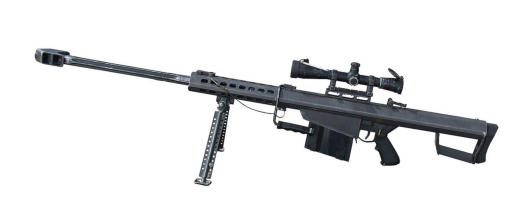

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sniper


In [185]:
Gun_check("test3.jpg")

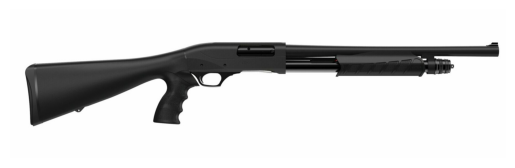

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
12-Bore (ShortGun)


In [188]:
Gun_check("test4.jpg")

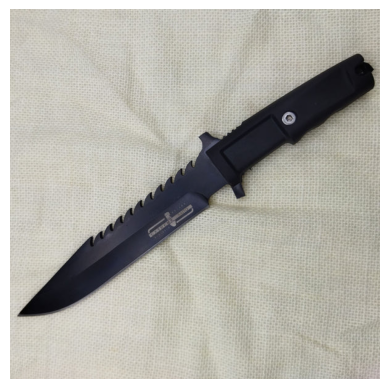

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
knife


In [189]:
Gun_check("test5.jpg")